# Projeto Final IA

## Introdução
Este projeto tem como objetivo a aplicação de algoritmos de aprendizado de máquina para classificação de pacientes com câncer de pulmão. O dataset foi pré-processado para a remoção de valores nulos e a transformação de atributos categóricos em numéricos.

O dataset utilizado contém 25 atributos e 1000 instâncias:
- Air Pollution: poluição do ar
- Alcohol use: uso de álcool
- Dust Allergy: alergia a poeira
- OccuPational Hazards: riscos ocupacionais
- Genetic Risk: risco genético
- chronic Lung Disease: doença pulmonar crônica
- Balanced Diet: dieta balanceada
- Obesity: obesidade
- Smoking: fumante
- Passive Smoker: fumante passivo
- Coughing of Blood: tosse com sangue
- Fatigue: fadiga
- Weight Loss: perda de peso
- Shortness of Breath: falta de ar
- Wheezing: chiado
- Swallowing Difficulty: dificuldade de engolir
- Clubbing of Finger Nails: unhas em formato de clube
- Frequent Cold: resfriado frequente
- Dry Cough: tosse seca
- Snoring: ronco
- Level: nível de câncer


### Importando as bibliotecas e dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('./datasets/cancer_patients.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Pré-processamento

#### Removendo valores nulos

In [3]:
# print rows with nan values
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [index, Patient Id, Age, Gender, Air Pollution, Alcohol use, Dust Allergy, OccuPational Hazards, Genetic Risk, chronic Lung Disease, Balanced Diet, Obesity, Smoking, Passive Smoker, Chest Pain, Coughing of Blood, Fatigue, Weight Loss, Shortness of Breath, Wheezing, Swallowing Difficulty, Clubbing of Finger Nails, Frequent Cold, Dry Cough, Snoring, Level]
Index: []

[0 rows x 26 columns]


Não há valores nulos no dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### Correspondência entre features

In [10]:
# Antes de observar a correspondência entre features, é necessário transformar os atributos categóricos em numéricos.

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
le = LabelEncoder()
y = le.fit_transform(df["Level"])

<Axes: >

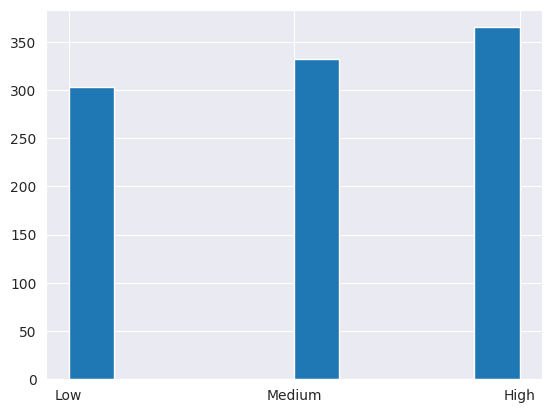

In [13]:
df["Level"].hist()

In [14]:
y

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [15]:
df["Level"] = y

/tmp/ipykernel_6631/267686861.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

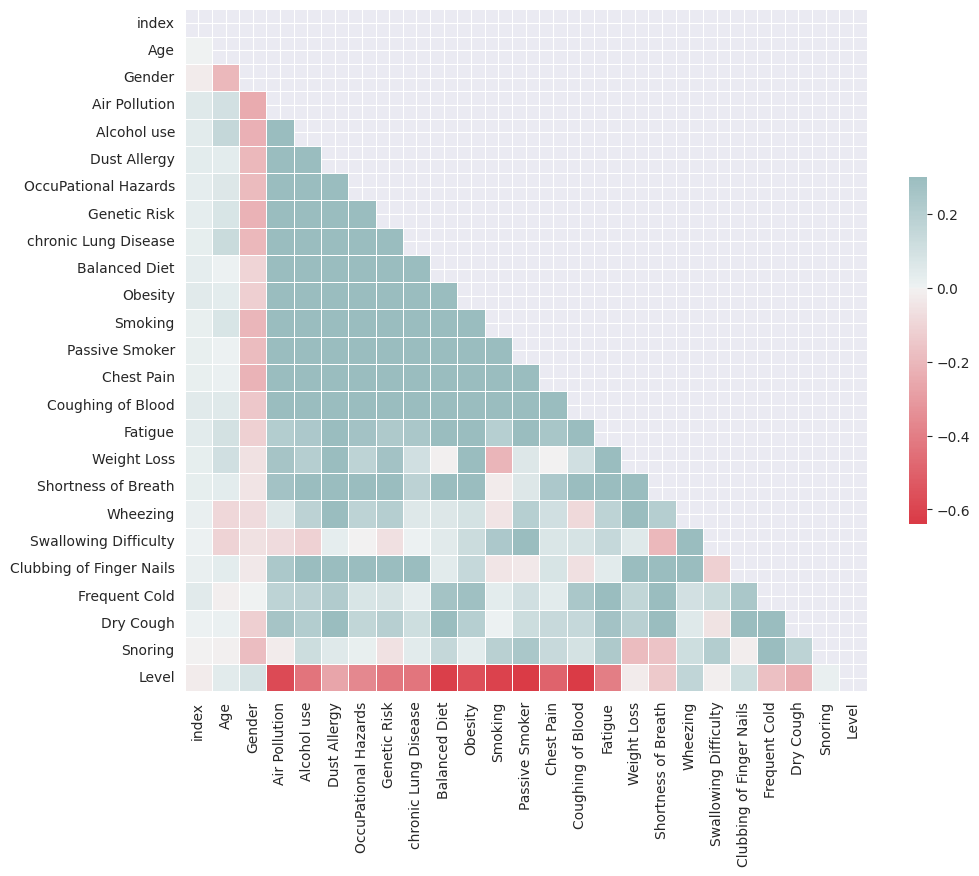

In [16]:
# Calcular matriz de correlação
corr = df.corr()

# Gerar uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar a figura matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar um mapa de cores divergentes personalizado
cmap = sns.diverging_palette(10, 200, as_cmap=True)

# Desenhar o mapa de calor com a máscara e a proporção correta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
# Há diversas features disponíveis para ser utilizado no treinamento do modelo, porém será utilizado as mais influentes delas.
features = [
    'Air Pollution', 'Alcohol use', 'chronic Lung Disease',
    'Balanced Diet', 'Obesity', 'Smoking',
    'Passive Smoker', 'Coughing of Blood'
]

In [18]:
df['Level']

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int64

array([[<Axes: title={'center': 'Air Pollution'}>,
        <Axes: title={'center': 'Alcohol use'}>,
        <Axes: title={'center': 'chronic Lung Disease'}>],
       [<Axes: title={'center': 'Balanced Diet'}>,
        <Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Smoking'}>],
       [<Axes: title={'center': 'Passive Smoker'}>,
        <Axes: title={'center': 'Coughing of Blood'}>, <Axes: >]],
      dtype=object)

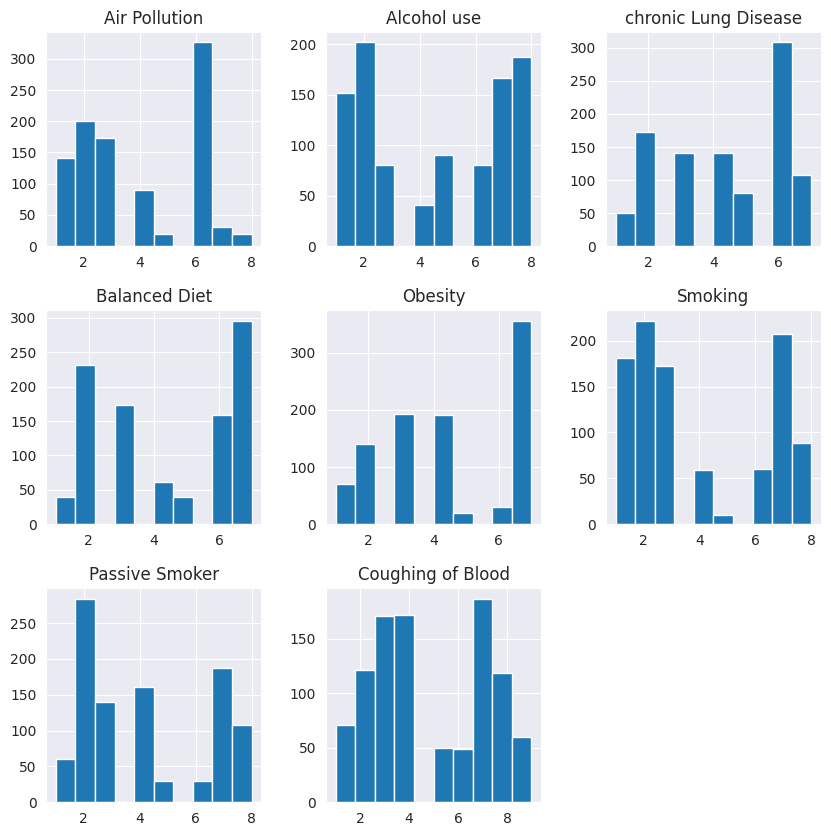

In [19]:
X = df[features]
X.hist(figsize=(10,10))

### Normalização

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [25]:
X

,0,1,2,3,4,5,6,7
0,0.142857,0.428571,0.166667,0.166667,0.500000,0.285714,0.142857,0.375
1,0.285714,0.000000,0.166667,0.166667,0.166667,0.142857,0.428571,0.250
2,0.428571,0.571429,0.500000,0.833333,1.000000,0.142857,0.285714,0.875
3,0.857143,0.857143,1.000000,1.000000,1.000000,0.857143,0.857143,0.875
4,0.714286,1.000000,0.833333,1.000000,1.000000,1.000000,0.857143,1.000
...,...,...,...,...,...,...,...,...
995,0.714286,0.857143,0.833333,1.000000,1.000000,0.857143,1.000000,0.750
996,0.714286,1.000000,0.833333,1.000000,1.000000,0.857143,1.000000,0.750
997,0.428571,0.571429,0.500000,0.833333,1.000000,0.142857,0.285714,0.875
998,0.714286,1.000000,0.833333,1.000000,1.000000,1.000000,0.857143,1.000


In [26]:
y

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Treinamento dos modelos

In [28]:
# árvore de decisão
from sklearn.tree import DecisionTreeClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# MLP
from sklearn.neural_network import MLPClassifier
# SVR
from sklearn.svm import SVC
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# XGBoosting
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# accuracy
from sklearn.metrics import accuracy_score
# r2 score
from sklearn.metrics import r2_score

In [35]:
total_accuracy = []
total_r2 = []
models = [
    DecisionTreeClassifier(criterion="entropy", max_depth=20), DecisionTreeClassifier(criterion="gini", max_depth=40),
    KNeighborsClassifier(n_neighbors=5, metric="infinity"), KNeighborsClassifier(n_neighbors=10, metric="euclidean"),
    MLPClassifier(learning_rate="constant", batch_size=100, activation="relu"), MLPClassifier(learning_rate="adaptive", batch_size=200, activation="logistic"),
    SVC(kernel="linear", C=1.0, gamma="auto"), SVC(kernel="rbf", C=2.0, gamma="auto"),
    RandomForestClassifier(random_state=42, max_depth=20, criterion="log_loss"), GradientBoostingClassifier(criterion="squared_error", max_depth=20)
]
for model in models:
    accuracy_temp = []
    r2_temp = []
    for _ in range(10):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model_ = model
        model_.fit(x_train.values, y_train)
        y_pred = model_.predict(x_test.values)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_temp.append(accuracy)
        r2 = r2_score(y_test, y_pred)
        r2_temp.append(r2)

    total_accuracy.append(np.mean(accuracy_temp))
    total_r2.append(np.mean(r2_temp))

/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jhonatan/.local/lib/python3.10/sit

### Resultados

In [36]:
result_df = pd.DataFrame({
    "Model": ["Decision Tree", "Decision Tree", "KNN", "KNN", "MLP", "MLP", "SVC", "SVC", "Random Forest", "XGBoosting"],
    "Conf": ["criterion='entropy', max_depth=20", "criterion='gini', max_depth=40", "n_neighbors=5, metric='infinity'", "n_neighbors=10, metric='euclidean'", "learning_rate='constant', batch_size=100, activation='relu'", "learning_rate='adaptive', batch_size=200, activation='logistic'", "kernel='linear', C=1.0, gamma='auto'", "kernel='rbf', C=2.0, gamma='auto'", "random_state=42, max_depth=20, criterion='log_loss'", "criterion='squared_error', max_depth=20"],
    "Accuracy": total_accuracy,
    "R2": total_r2
})
result_df

,Model,Conf,Accuracy,R2
0,Decision Tree,"criterion='entropy', max_depth=20",1.0000,1.000000
1,Decision Tree,"criterion='gini', max_depth=40",1.0000,1.000000
2,KNN,"n_neighbors=5, metric='infinity'",1.0000,1.000000
3,KNN,"n_neighbors=10, metric='euclidean'",0.9975,0.996403
4,MLP,"learning_rate='constant', batch_size=100, acti...",0.9870,0.981501
5,MLP,"learning_rate='adaptive', batch_size=200, acti...",0.7825,0.493989
6,SVC,"kernel='linear', C=1.0, gamma='auto'",0.8485,0.658495
7,SVC,"kernel='rbf', C=2.0, gamma='auto'",0.8655,0.696468
8,Random Forest,"random_state=42, max_depth=20, criterion='log_...",1.0000,1.000000
9,XGBoosting,"criterion='squared_error', max_depth=20",1.0000,1.000000


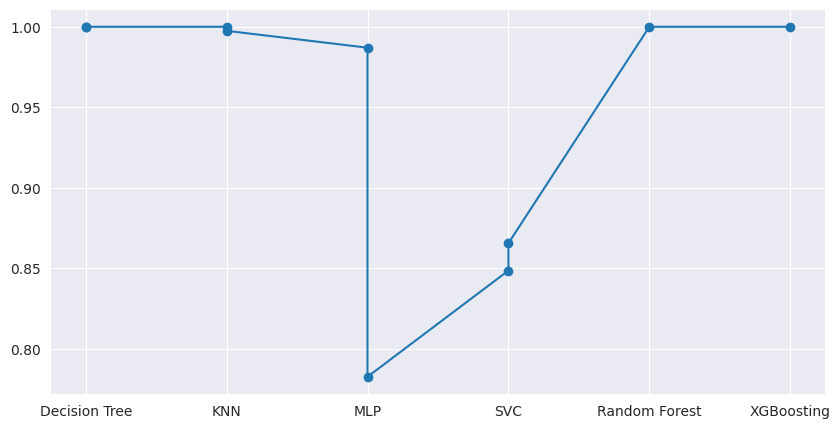

In [39]:
# plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(result_df["Model"], result_df["Accuracy"], marker='o')

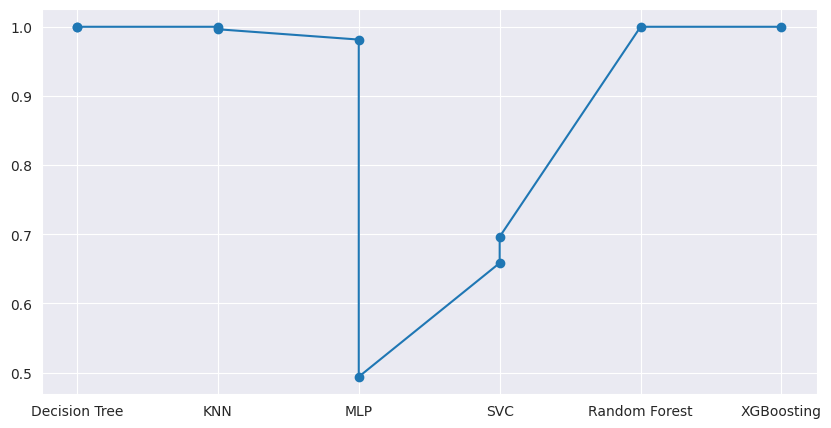

In [40]:
# plot r2
plt.figure(figsize=(10, 5))
plt.plot(result_df["Model"], result_df["R2"], marker='o')